Shortest Path: [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (10, 14)]


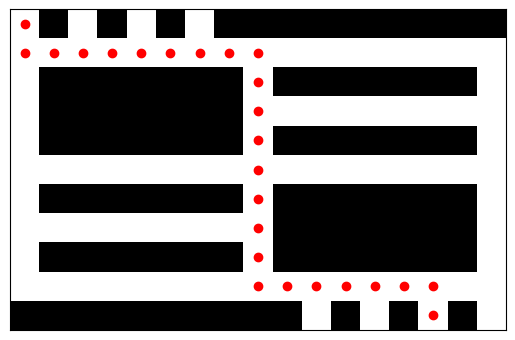

In [6]:
import matplotlib.pyplot as plt

def create_grid():
    # Create a grid represented as a list of lists.
    # 0 represents free space, 1 represents obstacle.
    grid = [
        [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
    ]
    return grid

# Create the grid and uniform cost map (all costs are 1)
grid = create_grid()
costs = [[1 for _ in range(len(grid[0]))] for _ in range(len(grid))]

def insert_sorted_by_distance(queue, item):
    """
    Insert (distance, node) tuple into queue maintaining ascending order by distance.
    This implements a simple priority queue logic without using external libraries.
    """
    distance, _ = item
    for i in range(len(queue)):
        if distance < queue[i][0]:
            queue.insert(i, item)
            return
    queue.append(item)  # Insert at the end if distance is largest

def dijkstra(grid, costs, start, goal):
    """
    Implementation of Dijkstra's algorithm for shortest path in a grid.
    - grid: 2D list representing map (0 = walkable, 1 = obstacle)
    - costs: 2D list of same size representing movement cost to each cell
    - start: tuple (row, col) start coordinates
    - goal: tuple (row, col) goal coordinates
    Returns list of nodes representing the shortest path from start to goal.
    """
    rows, cols = len(grid), len(grid[0])
    visited = set()  # Keep track of visited nodes
    distances = {start: 0}  # Distance from start to node
    parents = {start: None}  # Parent node to reconstruct path

    priority_queue = []
    insert_sorted_by_distance(priority_queue, (0, start))  # Initialize queue with start node

    # Define possible movement directions: right, down, left, up
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    while priority_queue:
        current_distance, current_node = priority_queue.pop(0)

        # Skip if already visited
        if current_node in visited:
            continue
        visited.add(current_node)

        # If goal reached, stop the search
        if current_node == goal:
            break

        # Explore neighbors in four directions
        for direction in directions:
            neighbor = (current_node[0] + direction[0], current_node[1] + direction[1])

            # Check if neighbor is within grid bounds and is walkable (no obstacle)
            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] == 0):
                distance = current_distance + costs[neighbor[0]][neighbor[1]]

                # If new shorter distance found for neighbor update distances and parents
                if neighbor not in distances or distance < distances[neighbor]:
                    distances[neighbor] = distance
                    parents[neighbor] = current_node
                    insert_sorted_by_distance(priority_queue, (distance, neighbor))

    # Reconstruct shortest path from goal to start by following parents
    path = []
    node = goal
    while node is not None:
        if node not in parents:
            # If a node has no parent, path reconstruction failed, return empty path
            print(f"Error: Node {node} has no parent. Path reconstruction failed.")
            return []
        path.append(node)
        node = parents[node]
    path.reverse()  # Reverse path to start-to-goal order
    return path

start = (0, 0)
goal = (10, 14)

# Calculate shortest path
path = dijkstra(grid, costs, start, goal)
print("Shortest Path:", path)

def plot_grid(grid, path=None):
    """
    Visualizes the grid and optionally overlays the path.
    Obstacles are in black, free cells in white, and the path in red circles.
    """
    plt.imshow(grid, cmap='binary')
    if path:
        # Plot each node in path as a red dot
        for (x, y) in path:
            plt.plot(y, x, marker='o', color='red')
    plt.xticks([])  # Remove x-axis tick marks for cleaner visualization
    plt.yticks([])  # Remove y-axis tick marks
    plt.show()

# Show the grid with the shortest path highlighted
plot_grid(grid, path=path)
